<a href="https://colab.research.google.com/github/DmitrijLeontev/Dmitrij_Leontev/blob/main/DzDatascience/40_UltraPro_TextToSpeech_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%B0%D1%83%D0%B4%D0%B8%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Напишите простую нейронную сеть для задачи классификации картинок cifar10. Используя библиотеку gTTS, напишите колбэк, при помощи которого (после обучения сети), автоматически будет воспроизводиться фраза "Обучение закончено. Точность сети на проверочной выборке {здесь озвучивается точность в процентах}".

In [ ]:
# Ваше решение

Создание сверточной нейросети и ее сохранение.

Это сверточная сеть для классификации стандартного набора Cifar10.

Важно! Для ускорения обучения модели стоит переключиться на GPU в верхнем меню Colab:

Среда выполнения --> Сменить среду выполнения --> Аппаратный ускоритель

Загрузка базы изображений и ее конвертация в нужный формат

In [ ]:
%%capture

# Бесплатная библиотека Google для задачи TTS
!pip install gTTS

In [ ]:
# Импорт библиотеки google-cloud-texttospeech
import gtts

# Основной интерфейс для перевода текста в аудио
from gtts import gTTS

# Используем для проигрывания аудио
from IPython.display import Audio

Словарь со всеми доступными языками. К сожалению, для русского языка доступен только один голос:

In [ ]:
gtts.lang.tts_langs()

{'af': 'Afrikaans',
 'ar': 'Arabic',
 'bg': 'Bulgarian',
 'bn': 'Bengali',
 'bs': 'Bosnian',
 'ca': 'Catalan',
 'cs': 'Czech',
 'da': 'Danish',
 'de': 'German',
 'el': 'Greek',
 'en': 'English',
 'es': 'Spanish',
 'et': 'Estonian',
 'fi': 'Finnish',
 'fr': 'French',
 'gu': 'Gujarati',
 'hi': 'Hindi',
 'hr': 'Croatian',
 'hu': 'Hungarian',
 'id': 'Indonesian',
 'is': 'Icelandic',
 'it': 'Italian',
 'iw': 'Hebrew',
 'ja': 'Japanese',
 'jw': 'Javanese',
 'km': 'Khmer',
 'kn': 'Kannada',
 'ko': 'Korean',
 'la': 'Latin',
 'lv': 'Latvian',
 'ml': 'Malayalam',
 'mr': 'Marathi',
 'ms': 'Malay',
 'my': 'Myanmar (Burmese)',
 'ne': 'Nepali',
 'nl': 'Dutch',
 'no': 'Norwegian',
 'pl': 'Polish',
 'pt': 'Portuguese',
 'ro': 'Romanian',
 'ru': 'Russian',
 'si': 'Sinhala',
 'sk': 'Slovak',
 'sq': 'Albanian',
 'sr': 'Serbian',
 'su': 'Sundanese',
 'sv': 'Swedish',
 'sw': 'Swahili',
 'ta': 'Tamil',
 'te': 'Telugu',
 'th': 'Thai',
 'tl': 'Filipino',
 'tr': 'Turkish',
 'uk': 'Ukrainian',
 'ur': 'Urdu',
 '

In [ ]:
# Загрузка библиотек

from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from gtts import gTTS
import os
import matplotlib.pyplot as plt
from IPython.display import Audio
import io


In [ ]:
from tensorflow.keras.datasets import cifar10

# Загрузка cifar10
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

In [ ]:
# Размер изображения 32 x 32, 3 канала (цветное)

x_train10.shape

(50000, 32, 32, 3)

In [ ]:
# Определение названий классов в порядке, установленном в описании набора данных

classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:
# Нормирование изображений

x_train10 = x_train10 / 255.
x_test10 = x_test10 / 255.

In [ ]:
# Перевод меток класса y_train и y_test в формат one hot encoding

from tensorflow.keras import utils

# Число категорий в to_categorical() можно не указывать - инструмент определит его по данным
y_train10 = utils.to_categorical(y_train10)
y_test10 = utils.to_categorical(y_test10)

In [ ]:
# Проверка формы получившихся выборок

print(x_train10.shape)
print(x_test10.shape)
print(y_train10.shape)
print(y_test10.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


Задайте размер пакета:

In [ ]:
batch_size = 128

Создайте архитектуру модели:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [ ]:
model = Sequential()

model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(10, activation='softmax'))

Проверьте созданную архитектуру модели:

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Bat  (None, 32, 32, 3)         12        
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_7 (Bat  (None, 16, 16, 32)       

In [ ]:
# Компиляция модели
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])


In [ ]:
# Класс колбэка для gTTS и IPython
class TTS_Callback(Callback):
    def on_train_end(self, logs=None):
        accuracy = logs.get('val_accuracy') * 100
        tts = gTTS(f'Обучение закончено. Точность сети на проверочной выборке {accuracy:.2f} процентов', lang='ru')
        fp = io.BytesIO()
        tts.write_to_fp(fp)
        fp.seek(0)
        display(Audio(fp.read(), autoplay=True))



Epoch 1/100
391/391 [==============================] - 7s 11ms/step - loss: 1.7165 - accuracy: 0.3710 - val_loss: 2.1315 - val_accuracy: 0.2590
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 1.3843 - accuracy: 0.4950 - val_loss: 1.2977 - val_accuracy: 0.5256
Epoch 3/100
391/391 [==============================] - 4s 10ms/step - loss: 1.2263 - accuracy: 0.5573 - val_loss: 1.1506 - val_accuracy: 0.5903
Epoch 4/100
391/391 [==============================] - 4s 11ms/step - loss: 1.1174 - accuracy: 0.5991 - val_loss: 1.0510 - val_accuracy: 0.6307
Epoch 5/100
391/391 [==============================] - 4s 11ms/step - loss: 1.0290 - accuracy: 0.6328 - val_loss: 1.0305 - val_accuracy: 0.6388
Epoch 6/100
391/391 [==============================] - 4s 10ms/step - loss: 0.9521 - accuracy: 0.6615 - val_loss: 0.9567 - val_accuracy: 0.6640
Epoch 7/100
391/391 [==============================] - 4s 9ms/step - loss: 0.8885 - accuracy: 0.6854 - val_loss: 0.8852 - val_accuracy: 

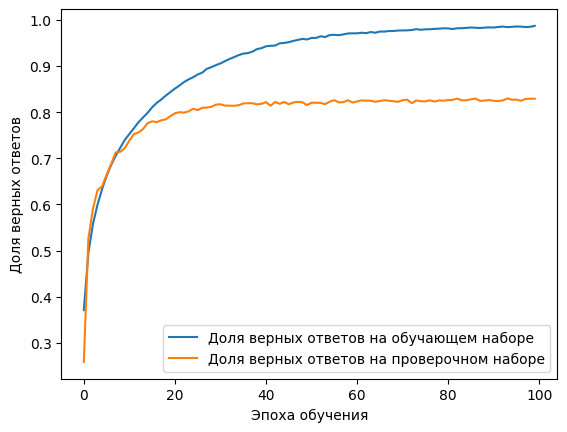

In [ ]:
# Обучение модели с колбэком
history = model.fit(x_train10,
                    y_train10,
                    batch_size=batch_size,
                    epochs=100,
                    validation_data=(x_test10, y_test10),
                    verbose=1,
                    callbacks=[TTS_Callback()])


# Вывод графика точности обучения

import matplotlib.pyplot as plt # -------- отрисовка графиков

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()
